# Getting more than just the max, min, and mean on weather data

As a modeler who deals with probabilities and uncertainty all the time, I've always been a little frustrated by typical historical weather data that only captures records and "normal" values (30-year averages).  Recently, I was trying to decide when to book a week of staycation and wanted to find a week that could be expected to be after that worst of the summer heat had passed.  Instead of looking at maximums and averages, I wanted to see a distribution and look at quantiles.  

As you'll see below, I decided to look at data by week over a 50-year period.  That gave me a sample of 7 x 50 = 350 data points, enough for a decent distribution.  One could argue that, given climate change, I should use 30 or even 20 years of data.  That's an easy enough change to make and the data can be filtered accordingly.  Using 20 years, you still have 140 data points for each week.  I chose a week's worth of data since temperatures don't vary dramatically in the space of 7 days and it aligned with my desired to look for a week to take time off.

To get weather information in the US (and many other countries) a good place to start is https://www.ncdc.noaa.gov/cdo-web/datatools/findstation.  You can order a file of data to be prepared.  The system will email you a link where you can download the ordered data, usually in just a few minutes.  Be sure to check the file for completeness.  Airports and National Weather Service offices tend to have the most complete reporting.  Also check the date ranges.

The information at  https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ was useful in helping me with some of the Pandas aggregation options as was the Pandas documentation.

In [25]:
# There aren't that many libraries neededd for this

import pandas as pd
import datetime
import numpy as np
import matplotlib
import seaborn as sns

This data is from Richmond (Virginia) International Airport

In [28]:
df = pd.read_csv("data/ric_temps_1970_2019.csv")

df

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1970-01-01,NaN,34,27
1,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1970-01-02,NaN,42,19
2,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1970-01-03,NaN,48,24
3,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1970-01-04,NaN,35,17
4,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1970-01-05,NaN,47,14
...,...,...,...,...,...,...
18257,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-27,48.0,61,40
18258,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-28,53.0,67,39
18259,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-29,53.0,63,47
18260,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-30,66.0,73,49


In [29]:
df.shape

(18262, 6)

In [4]:
df['formatted_date'] = pd.to_datetime(df['DATE'])

In [5]:
#df['week_of_year'] = df.formatted_date.apply(lambda x: x.weekofyear)
df['week_of_year'] = df.formatted_date.apply(lambda x: x.isocalendar()[1])

In [6]:
df

,STATION,NAME,DATE,TAVG,TMAX,TMIN,formatted_date,week_of_year
0,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-01-01,NaN,40,19,1969-01-01,1
1,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-01-02,NaN,32,19,1969-01-02,1
2,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-01-03,NaN,42,17,1969-01-03,1
3,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-01-04,NaN,35,17,1969-01-04,1
4,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-01-05,NaN,27,12,1969-01-05,1
...,...,...,...,...,...,...,...,...
18622,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-27,48.0,61,40,2019-12-27,52
18623,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-28,53.0,67,39,2019-12-28,52
18624,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-29,53.0,63,47,2019-12-29,52
18625,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-12-30,66.0,73,49,2019-12-30,1


In [7]:
#df.groupby('week_of_year')['TMAX'].quantile(0.95)

In [8]:
#sf = df.groupby('week_of_year')['TMAX'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

In [ ]:
#sf

In [ ]:
#df1 = pd.DataFrame(data=sf.index, columns=['quantile'])

In [ ]:
#df1

In [ ]:
#df2 = pd.DataFrame(data=sf.values, columns=['value'])

In [ ]:
#df2

In [ ]:
#df3 = sf.to_frame()

In [ ]:
#df3

In [ ]:
#df.groupby(['week_of_year']).agg(
#    TMIN_min=('TMIN', min),
#    TMAX_max=('TMAX', max)
#)

In [7]:
df_quantiles = df.groupby(['week_of_year']).agg(
    TMIN_min=('TMIN', min),
    TMIN_05=('TMIN', lambda x: np.quantile(x, 0.05)),
    TMIN_25=('TMIN', lambda x: np.quantile(x, 0.25)),
    TMIN_50=('TMIN', lambda x: np.quantile(x, 0.50)),
    TMIN_75=('TMIN', lambda x: np.quantile(x, 0.75)),
    TMIN_95=('TMIN', lambda x: np.quantile(x, 0.95)),
    TMIN_max=('TMIN', max),
    TMAX_min=('TMAX', min),
    TMAX_05=('TMAX', lambda x: np.quantile(x, 0.05)),
    TMAX_25=('TMAX', lambda x: np.quantile(x, 0.25)),
    TMAX_50=('TMAX', lambda x: np.quantile(x, 0.50)),
    TMAX_75=('TMAX', lambda x: np.quantile(x, 0.75)),
    TMAX_95=('TMAX', lambda x: np.quantile(x, 0.95)),
    TMAX_max=('TMAX', max)
)

In [8]:
df_quantiles

,TMIN_min,TMIN_05,TMIN_25,TMIN_50,TMIN_75,TMIN_95,TMIN_max,TMAX_min,TMAX_05,TMAX_25,TMAX_50,TMAX_75,TMAX_95,TMAX_max
week_of_year,,,,,,,,,,,,,,
1,-3,14.0,23.0,30,36.0,46.2,57,21,30.0,40.0,46,54,70.0,76
2,0,8.8,21.0,28,35.0,47.0,62,12,27.8,38.0,46,56,69.0,75
3,-2,9.0,20.0,27,34.0,43.0,56,12,28.0,37.0,45,54,66.0,75
4,-6,11.0,21.0,27,33.0,40.0,50,15,30.0,40.0,47,55,66.0,76
5,-1,12.0,23.0,29,34.0,45.2,59,18,31.0,39.0,47,57,70.2,81
6,-8,13.0,22.0,27,32.0,44.0,63,21,31.0,40.0,46,56,70.0,82
7,6,16.0,24.0,29,34.0,45.2,61,14,33.0,42.0,50,58,69.0,82
8,3,17.0,27.0,32,40.0,49.2,61,21,35.8,45.0,54,64,73.0,82
9,11,20.0,27.0,33,38.0,48.2,63,21,36.0,46.0,53,62,74.2,81


In [9]:
df_quantiles.reset_index(level=0, inplace=True)

In [10]:
df_quantiles

,week_of_year,TMIN_min,TMIN_05,TMIN_25,TMIN_50,TMIN_75,TMIN_95,TMIN_max,TMAX_min,TMAX_05,TMAX_25,TMAX_50,TMAX_75,TMAX_95,TMAX_max
0,1,-3,14.0,23.0,30,36.0,46.2,57,21,30.0,40.0,46,54,70.0,76
1,2,0,8.8,21.0,28,35.0,47.0,62,12,27.8,38.0,46,56,69.0,75
2,3,-2,9.0,20.0,27,34.0,43.0,56,12,28.0,37.0,45,54,66.0,75
3,4,-6,11.0,21.0,27,33.0,40.0,50,15,30.0,40.0,47,55,66.0,76
4,5,-1,12.0,23.0,29,34.0,45.2,59,18,31.0,39.0,47,57,70.2,81
5,6,-8,13.0,22.0,27,32.0,44.0,63,21,31.0,40.0,46,56,70.0,82
6,7,6,16.0,24.0,29,34.0,45.2,61,14,33.0,42.0,50,58,69.0,82
7,8,3,17.0,27.0,32,40.0,49.2,61,21,35.8,45.0,54,64,73.0,82
8,9,11,20.0,27.0,33,38.0,48.2,63,21,36.0,46.0,53,62,74.2,81
9,10,10,20.8,28.0,34,42.0,52.0,63,29,38.0,49.0,57,67,78.2,86


In [11]:
# df['week_of_year'] = df.formatted_date.apply(lambda x: x.isocalendar()[1])


# df_quantiles['week_of_year'].apply(lambda x: datetime.fromisocalendar(2020, x, 1))

df_quantiles.columns

Index(['week_of_year', 'TMIN_min', 'TMIN_05', 'TMIN_25', 'TMIN_50', 'TMIN_75',
       'TMIN_95', 'TMIN_max', 'TMAX_min', 'TMAX_05', 'TMAX_25', 'TMAX_50',
       'TMAX_75', 'TMAX_95', 'TMAX_max'],
      dtype='object')

In [12]:
df_quantiles['date_2020'] = df_quantiles['week_of_year'].apply(lambda x: datetime.date.fromisocalendar(2020, x, 1))

In [13]:
df_quantiles[['date_2020', 'TMAX_50', 'TMAX_75', 'TMAX_95', 'TMAX_max']]

,date_2020,TMAX_50,TMAX_75,TMAX_95,TMAX_max
0,2019-12-30,46,54,70.0,76
1,2020-01-06,46,56,69.0,75
2,2020-01-13,45,54,66.0,75
3,2020-01-20,47,55,66.0,76
4,2020-01-27,47,57,70.2,81
5,2020-02-03,46,56,70.0,82
6,2020-02-10,50,58,69.0,82
7,2020-02-17,54,64,73.0,82
8,2020-02-24,53,62,74.2,81
9,2020-03-02,57,67,78.2,86


In [14]:
df_quantiles.loc[df_quantiles['date_2020'] >= datetime.date(2020, 8, 1), ['date_2020', 'TMAX_50', 'TMAX_75', 'TMAX_95', 'TMAX_max']]

,date_2020,TMAX_50,TMAX_75,TMAX_95,TMAX_max
31,2020-08-03,88,92,97.2,104
32,2020-08-10,88,91,97.0,102
33,2020-08-17,86,90,95.0,102
34,2020-08-24,87,91,96.0,100
35,2020-08-31,85,89,95.0,101
36,2020-09-07,83,88,93.0,98
37,2020-09-14,81,85,92.2,98
38,2020-09-21,77,82,90.0,97
39,2020-09-28,76,82,88.0,98
40,2020-10-05,73,78,85.0,95


In [15]:
#(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33)

df_quantiles.loc[(df_quantiles['date_2020'] >= datetime.date(2020, 8, 1)) & 
                 (df_quantiles['date_2020'] < datetime.date(2020, 8, 8)), 
                 ['date_2020', 'TMAX_50', 'TMAX_75', 'TMAX_95', 'TMAX_max']]

,date_2020,TMAX_50,TMAX_75,TMAX_95,TMAX_max
31,2020-08-03,88,92,97.2,104


In [20]:
df[df['week_of_year'] == 35]

,STATION,NAME,DATE,TAVG,TMAX,TMIN,formatted_date,week_of_year
236,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-08-25,NaN,90,63,1969-08-25,35
237,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-08-26,NaN,89,63,1969-08-26,35
238,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-08-27,NaN,79,57,1969-08-27,35
239,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-08-28,NaN,81,54,1969-08-28,35
240,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",1969-08-29,NaN,84,56,1969-08-29,35
...,...,...,...,...,...,...,...,...
18501,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-08-28,76.0,86,68,2019-08-28,35
18502,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-08-29,74.0,86,64,2019-08-29,35
18503,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-08-30,75.0,92,59,2019-08-30,35
18504,USW00013740,"RICHMOND INTERNATIONAL AIRPORT, VA US",2019-08-31,78.0,93,63,2019-08-31,35


In [21]:

df.loc[df['week_of_year'] == 35, 'TMAX']

236      90
237      89
238      79
239      81
240      84
         ..
18501    86
18502    86
18503    92
18504    93
18505    89
Name: TMAX, Length: 357, dtype: int64

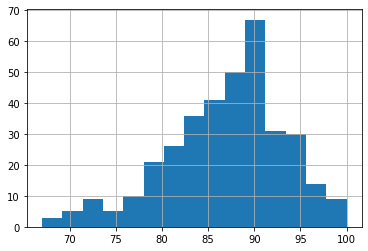

In [23]:
df.loc[df['week_of_year'] == 35, 'TMAX'].hist(bins=15)

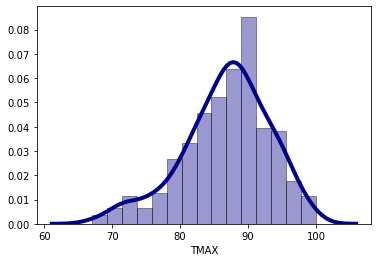

In [24]:
#sns.distplot(df['TMAX'], hist=True, kde=True, 
#             bins=int(15), color = 'darkblue', 
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 4, 'bw':'scott'})

sns.distplot(df.loc[df['week_of_year'] == 35, 'TMAX'], hist=True, kde=True, 
             bins=int(15), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'bw':'scott'})